In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%%bash
uname -a
whoami
ls /eos/cms/tier0/store/data/Run2017
edmFileUtil root://eoscms.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/AE49FDAB-8398-E611-9B98-02163E014388.root
edmFileUtil root://cms-xrd-tzero.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/061/00000/5C4984B0-B86A-E711-837F-02163E01A792.root


Linux vinavx3.cern.ch 3.10.0-514.10.2.el7.x86_64 #1 SMP Fri Mar 3 00:04:05 UTC 2017 x86_64 x86_64 x86_64 GNU/Linux
innocent
root://eoscms.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/AE49FDAB-8398-E611-9B98-02163E014388.root
ERR Could not open file root://eoscms.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/AE49FDAB-8398-E611-9B98-02163E014388.root
root://cms-xrd-tzero.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/061/00000/5C4984B0-B86A-E711-837F-02163E01A792.root
root://cms-xrd-tzero.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/061/00000/5C4984B0-B86A-E711-837F-02163E01A792.root (1 runs, 2 lumis, 9642 events, 3107653772 bytes)


ls: cannot access /eos/cms/tier0/store/data/Run2017: Permission denied
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3011] Unable to open file /eos/cms/store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/AE49FDAB-8398-E611-9B98-02163E014388.root; No such file or directory



In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
from multiprocessing import Pool
from DataFormats.FWLite import Handle, Events

Welcome to JupyROOT 6.10/01


In [4]:
xrd = 'root://cms-xrd-global.cern.ch//'
tier0 = 'root://cms-xrd-tzero.cern.ch//' # 'file:/eos/cms/tier0'
iter2 = 'file:/eos/cms'

#LS50
events2016HL = xrd+"/store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/AE49FDAB-8398-E611-9B98-02163E014388.root"
#LS1000
events2016LL = xrd+"/store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/88FB6BA5-7B98-E611-B25E-FA163EE1CC08.root"

events2017B_HL = tier0+"/store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/061/00000/5C4984B0-B86A-E711-837F-02163E01A792.root"
events2017B_LL = tier0+"/store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/067/00000/B4146406-F66A-E711-B9C9-02163E014389.root"

label = "generalTracks"
quality = "highPurity"

In [5]:
def nt(fevents) :
    print fevents
    events = Events(fevents)
    tracks = Handle("std::vector<reco::Track>")
    lumi = Handle("std::vector<LumiScalers>")
    nt = []
    for i in range(0,1000) : # events.size()):
      a= events.to(i)
      if (i%500==0) : print "Event", i 
      a=events.getByLabel(label, tracks)
      nt.append(tracks.product().size())
    print len(nt)
    id = events.object().id()
    a=events.getByLabel('scalersRawToDigi', lumi)
    runid = '{:d}:{:d}:{:.2e}'.format(int(id.run()),int(id.luminosityBlock()),lumi.product()[0].instantLumi())
    print runid
    return (runid,nt)

In [6]:
p = Pool(4)

root://cms-xrd-tzero.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/061/00000/5C4984B0-B86A-E711-837F-02163E01A792.root
root://cms-xrd-global.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/AE49FDAB-8398-E611-9B98-02163E014388.root
root://cms-xrd-tzero.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/067/00000/B4146406-F66A-E711-B9C9-02163E014389.root
root://cms-xrd-global.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/88FB6BA5-7B98-E611-B25E-FA163EE1CC08.root
Event 0
Event 0
Event 0
Event 500
Event 0
1000
299061:71:1.20e+04
Event 500
1000
299067:23:7.98e+03
Event 500
Event 500
1000
283408:999:8.97e+03
1000
283408:50:1.43e+04


In [7]:
t = -time.time()
ret = p.map(nt, [events2016HL,events2016LL,events2017B_HL,events2017B_LL])
#ret = map(nt, [events2016HL,events2016LL,events2017B_HL,events2017B_LL])
t +=time.time()
print t
for n in ret : print n[0],len(n[1])
runids,nts = zip(*ret)

78.6919720173
283408:50:1.43e+04 1000
283408:999:8.97e+03 1000
299061:71:1.20e+04 1000
299067:23:7.98e+03 1000


In [8]:
p.terminate()

In [9]:
def plotNT(nt):
    y,x = np.histogram(nt,np.linspace(0.,3000.,300))
    x.resize(len(y))
    return (y,x)

4
4 299


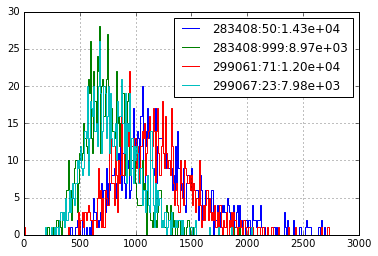

In [10]:
print len(nts)
#(y, x) = zip(*p.map(plotNT,nts))
(y, x) = zip(*map(plotNT,nts))
print len(x),len(y[0])
for i in range(0,len(y)) :
    plt.step(x[0],y[i],where='post',label=runids[i])
plt.grid(True)
plt.legend(loc='upper right')
plt.show()